# NFL Team Analysis - Cluster Insights

## Context
In this data analysis project, I explored the performance of NFL teams from the years 2003 to 2019. The dataset included various statistics for each team, such as wins, losses, offensive plays, turnovers, and more. My goal was to cluster NFL teams based on their performance characteristics and gain insights into different team playstyles and success levels.

## Methodology
1. **Data Preprocessing & Feature Engineering:** I began by preprocessing the dataset, handling missing values, and preparing it for clustering.

2. **K-Means Clustering:** I applied K-Means clustering to group the NFL teams into distinct clusters. The number of clusters was determined using the elbow method and silhouette analysis.

3. **Cluster Analysis & Visualization:** I created various visualizations to understand the clusters, including bar plots comparing features across clusters.

## Findings
Based on the K-Means clustering analysis, I identified four distinct clusters of NFL teams:

### Cluster 0: Bums
- This cluster comprises teams that have consistently underperformed in the NFL. They have relatively low statistics in various performance metrics.

### Cluster 1: Average Teams
- Teams in this cluster represent the middle-of-the-road NFL teams. They have average statistics and performance characteristics.

### Cluster 2: Successful Teams
- Cluster 2 consists of the most successful NFL teams. These teams have achieved a high number of Super Bowl victories. They are known for their strong overall performance.

### Cluster 3: Playoff-Caliber Teams
- Teams in this cluster are also successful but have not reached the same level of success as Cluster 2. They often make it to the playoffs and sometimes win the Super Bowl, but not as often as in Cluster 2. Additionally, these teams tend to prioritize rushing in their gameplay.

## Conclusion
In this analysis, I successfully clustered NFL teams based on their performance characteristics, revealing insights into their playstyles and success levels. Cluster 2 emerged as the cluster with the highest number of Super Bowl winners, while Cluster 3 showcased playoff-caliber teams that prioritize rushing in their gameplay.

This analysis provides valuable insights for NFL enthusiasts and analysts, shedding light on the diverse performance profiles of NFL teams over the years.

In [1]:
#Imports
import pandas as pd
import numpy as np
import warnings

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

#Read in data and check shape
df = pd.read_csv('team_stats_2003_2023.csv')
print(df.shape)
display(df.head())

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

(672, 35)


/var/folders/qn/rny7mnyd7kjfxx12b0m00v380000gn/T/ipykernel_59839/65076758.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


year                  team  wins  losses  win_loss_perc  points  \
0  2003  New England Patriots    14       2          0.875     348   
1  2003        Miami Dolphins    10       6          0.625     311   
2  2003         Buffalo Bills     6      10          0.375     243   
3  2003         New York Jets     6      10          0.375     283   
4  2003      Baltimore Ravens    10       6          0.625     391   

   points_opp  points_diff  mov   g  ...  rush_td  rush_yds_per_att  rush_fd  \
0         238          110  6.9  16  ...        9               3.4       91   
1         261           50  3.1  16  ...       14               3.7       99   
2         279          -36 -2.3  16  ...       13               3.9       96   
3         299          -16 -1.0  16  ...        8               4.0       78   
4         281          110  6.9  16  ...       18               4.8      115   

   penalties  penalties_yds  pen_fd  score_pct  turnover_pct  exp_pts_tot  \
0        111            998      26       27.9          11.3      -136.51   
1        103            913      22       28.1          17.2      -177.92   
2        106            891      22       21.9          17.6      -230.07   
3         69            550      15       32.4          11.8      -107.89   
4        126            970      23       31.8          16.6      -220.50   

   ties  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 35 columns]

## 1. Data Preprocessing & Feature Engineering

In [2]:
# Impute the 'ties' column with 0 where it is NaN
df['ties'] = df['ties'].fillna(0)

# Drop the 'mov' column - mov is Average Margin of Victory - there were many null values in this column
df = df.drop(columns=['mov'])

#Check for null values, data types, and duplicates
print(df.isnull().sum())
print()
print(df.dtypes)
print()
print(df.describe())
print()
print(df.duplicated().sum())

# Find and display duplicates
duplicates = df[df.duplicated()]
display(duplicates)

year                    0
team                    0
wins                    0
losses                  0
win_loss_perc           0
points                  0
points_opp              0
points_diff             0
g                       0
total_yards             0
plays_offense           0
yds_per_play_offense    0
turnovers               0
fumbles_lost            0
first_down              0
pass_cmp                0
pass_att                0
pass_yds                0
pass_td                 0
pass_int                0
pass_net_yds_per_att    0
pass_fd                 0
rush_att                0
rush_yds                0
rush_td                 0
rush_yds_per_att        0
rush_fd                 0
penalties               0
penalties_yds           0
pen_fd                  0
score_pct               0
turnover_pct            0
exp_pts_tot             0
ties                    0
dtype: int64

year                      int64
team                     object
wins                      int64
losses

Empty DataFrame
Columns: [year, team, wins, losses, win_loss_perc, points, points_opp, points_diff, g, total_yards, plays_offense, yds_per_play_offense, turnovers, fumbles_lost, first_down, pass_cmp, pass_att, pass_yds, pass_td, pass_int, pass_net_yds_per_att, pass_fd, rush_att, rush_yds, rush_td, rush_yds_per_att, rush_fd, penalties, penalties_yds, pen_fd, score_pct, turnover_pct, exp_pts_tot, ties]
Index: []

[0 rows x 34 columns]

In [3]:
# I remembered that there have several team name changes recently, so I wanted to check for that
df.team.value_counts()

team
New England Patriots        21
Seattle Seahawks            21
Tampa Bay Buccaneers        21
New Orleans Saints          21
Carolina Panthers           21
Detroit Lions               21
Chicago Bears               21
Minnesota Vikings           21
Green Bay Packers           21
New York Giants             21
Miami Dolphins              21
Dallas Cowboys              21
Philadelphia Eagles         21
San Francisco 49ers         21
Arizona Cardinals           21
Denver Broncos              21
Kansas City Chiefs          21
Houston Texans              21
Jacksonville Jaguars        21
Tennessee Titans            21
Indianapolis Colts          21
Cleveland Browns            21
Pittsburgh Steelers         21
Cincinnati Bengals          21
Baltimore Ravens            21
New York Jets               21
Buffalo Bills               21
Atlanta Falcons             21
Washington Redskins         17
Oakland Raiders             17
San Diego Chargers          14
St. Louis Rams              13
Los

In [4]:
# Rename teams to their latest names
team_name_changes = {
    "Washington Redskins": "Washington Commanders",
    "Washington Football Team": "Washington Commanders",
    "San Diego Chargers": "Los Angeles Chargers",
    "St. Louis Rams": "Los Angeles Rams",
    "Oakland Raiders": "Las Vegas Raiders"
}

# Apply the renaming
df['team'] = df['team'].replace(team_name_changes)

# Confirm the changes by checking the unique team names
unique_teams = df['team'].unique()
unique_teams.sort()
unique_teams

array(['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens',
       'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears',
       'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys',
       'Denver Broncos', 'Detroit Lions', 'Green Bay Packers',
       'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars',
       'Kansas City Chiefs', 'Las Vegas Raiders', 'Los Angeles Chargers',
       'Los Angeles Rams', 'Miami Dolphins', 'Minnesota Vikings',
       'New England Patriots', 'New Orleans Saints', 'New York Giants',
       'New York Jets', 'Philadelphia Eagles', 'Pittsburgh Steelers',
       'San Francisco 49ers', 'Seattle Seahawks', 'Tampa Bay Buccaneers',
       'Tennessee Titans', 'Washington Commanders'], dtype=object)

In [5]:
# Create a dictionary mapping Super Bowl winners to years
super_bowl_winners = {
    2003: "New England Patriots",
    2004: "New England Patriots",
    2005: "Pittsburgh Steelers",
    2006: "Indianapolis Colts",
    2007: "New York Giants",
    2008: "Pittsburgh Steelers",
    2009: "New Orleans Saints",
    2010: "Green Bay Packers",
    2011: "New York Giants",
    2012: "Baltimore Ravens",
    2013: "Seattle Seahawks",
    2014: "New England Patriots",
    2015: "Denver Broncos",
    2016: "New England Patriots",
    2017: "Philadelphia Eagles",
    2018: "New England Patriots",
    2019: "Kansas City Chiefs",
    2020: "Tampa Bay Buccaneers",
    2021: "Los Angeles Rams",
    2022: "Kansas City Chiefs",
}

# Add a column 'super_bowl_winner' to the dataset
df['super_bowl_winner'] = df.apply(lambda row: 'Yes' if row['year'] in super_bowl_winners and 
                                   row['team'] == super_bowl_winners[row['year']] else 'No', axis=1)

# Replace 'Yes' with 1 and 'No' with 0 in the 'super_bowl_winner' column
df['super_bowl_winner'] = df['super_bowl_winner'].map({'Yes': 1, 'No': 0})

# Display the first few rows of the updated dataset
df[['year', 'team', 'super_bowl_winner']].head()

team
New England Patriots     21
Miami Dolphins           21
San Francisco 49ers      21
Seattle Seahawks         21
Los Angeles Rams         21
Atlanta Falcons          21
Tampa Bay Buccaneers     21
New Orleans Saints       21
Carolina Panthers        21
Detroit Lions            21
Chicago Bears            21
Minnesota Vikings        21
Green Bay Packers        21
New York Giants          21
Washington Commanders    21
Dallas Cowboys           21
Philadelphia Eagles      21
Los Angeles Chargers     21
Las Vegas Raiders        21
Denver Broncos           21
Kansas City Chiefs       21
Houston Texans           21
Jacksonville Jaguars     21
Tennessee Titans         21
Indianapolis Colts       21
Cleveland Browns         21
Pittsburgh Steelers      21
Cincinnati Bengals       21
Baltimore Ravens         21
New York Jets            21
Buffalo Bills            21
Arizona Cardinals        21
Name: count, dtype: int64

In [37]:
# I wanted to do a little bit of EDA on the cleaned dataset so I could get some plotly practice
metrics = ['wins', 'losses', 'points']  
unique_teams = df['team'].unique()

fig = go.Figure()

for metric in metrics:
    for team in unique_teams:
        trace_name = f"{team} - {metric}"  # Unique identifier for each trace
        fig.add_trace(
            go.Scatter(
                x=df[df['team'] == team]['year'], 
                y=df[df['team'] == team][metric],
                mode='lines',
                name=trace_name,
                visible=(metric == metrics[0])  # Show only the first metric initially
            )
        )

# Create buttons for team selection
team_buttons = [
    dict(
        label=team,
        method="update",
        args=[{"visible": [trace.name.startswith(team) for trace in fig.data]},
              {"title": f"Showing data for {team}"}]
    ) for team in unique_teams
]

# Add team selection dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible": [metric == m for m in metrics]}],
                    label=metric,
                    method="update"
                ) for metric in metrics
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
        # dropdown for team selection
        dict(
            buttons=team_buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.3,  # adjust position to avoid overlap with the first dropdown
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ],
    template='plotly_dark',
)

# Show the figure
fig.show()

![Image Description](ny_jets_bums.png)

## 2. K-Means Clustering

In [17]:
# Feature selection - I chose the features that seemed the most valuable and least redundant
# I wanted to use features that might help highlight a team's strengths, weaknesses, and strategies
features = [
    'total_yards', 'plays_offense', 'pass_att', 'pass_yds', 'pass_td', 
    'rush_att', 'rush_yds', 'rush_td', 'points_opp', 'penalties', 
    'penalties_yds', 'turnovers', 'win_loss_perc', 'points', 'score_pct'
]

# Filtering the dataframe for the selected features
df_cluster = df[features].dropna()

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=7)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Calculate silhouette scores for a range of cluster numbers
silhouette_scores = []
for i in range(2, 11):  # silhouette score is not defined for 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=7)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, cluster_labels))

# Return WCSS and silhouette scores
wcss, silhouette_scores

([10080.0,
  7531.1950180818985,
  6375.030666384122,
  5820.831596500266,
  5571.994431056556,
  5214.579770392687,
  5016.6302877257785,
  4861.4838461980235,
  4609.140425227058,
  4492.522328727321],
 [0.21647137196368804,
  0.19901395589845614,
  0.15701342401453927,
  0.13148580357553752,
  0.13116181410238295,
  0.12201276088915249,
  0.11268654384809554,
  0.11797237362588055,
  0.11934370631578098])

Think of the WCSS as a measure of how closely NFL teams within the same cluster are to each other. A lower WCSS means that teams in a cluster are more similar in terms of their performance. In our analysis, we had WCSS values like 5757 and 5291, which tell us that teams within clusters tend to have similar statistics.

On the other hand, the Silhouette Score helps us understand how well-defined these clusters are. Higher Silhouette Scores mean that the clusters are distinct from each other. Our Silhouette Scores ranged from 0.15 to 0.19, indicating that the clusters have a good balance between cohesion (teams within a cluster are similar) and separation (teams in different clusters are different). This led me to choose four clusters, which struck the right balance in grouping NFL teams based on their performance characteristics. So, in simpler terms, these scores helped us find clusters where teams are similar within their cluster and different from teams in other clusters.

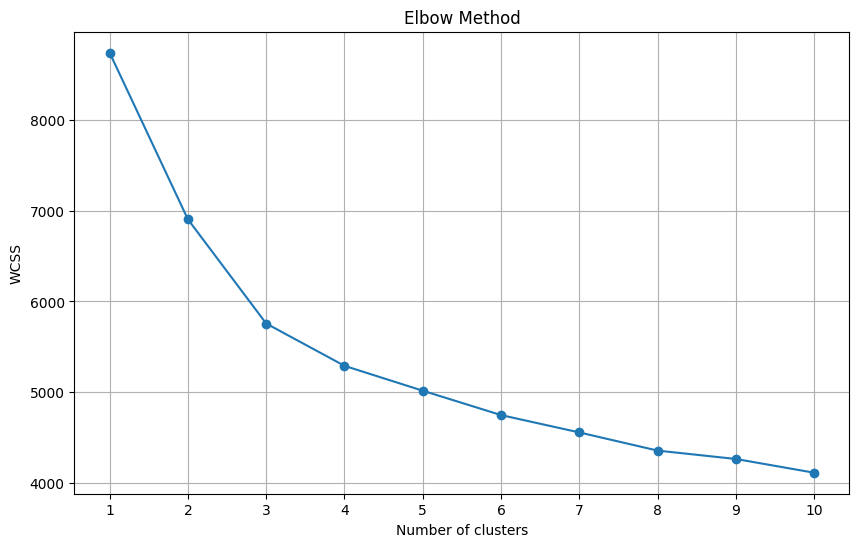

In [18]:
wcss = [8736.0, 6903.1778695159865, 5757.232581754785, 5291.748983177715, 5018.054086661274, 
        4750.008387845019, 4559.119740413214, 4359.256784010668, 4267.040176914252, 4115.96741455067]

# Number of clusters range
num_clusters = range(1, 11)

# Creating the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()

In [19]:
# Fitting the K-Means model with the chosen number of clusters (4)
clusters = 4
kmeans = KMeans(n_clusters=clusters, init='k-means++', random_state=7)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Displaying the first few rows with the assigned clusters
df[['year', 'team', 'cluster']].head()

year                  team  cluster
0  2003  New England Patriots        3
1  2003        Miami Dolphins        0
2  2003         Buffalo Bills        0
3  2003         New York Jets        0
4  2003      Baltimore Ravens        3

## 3. Cluster Analysis & Visualization

In [96]:
cluster_names = {
    0: "Bums",
    1: "Average teams",
    2: "Successful teams",
    3: "Playoff-caliber teams"
}

# Add a new column to your DataFrame with cluster names
df['cluster_name'] = df['cluster'].map(cluster_names)

# Create hover text for the scatter plot with cluster names
hover_text = df.apply(lambda row: f"Team: {row['team']}<br>Year: {row['year']}<br>Cluster: {row['cluster_name']}", axis=1)

# Define a dictionary mapping cluster numbers to NFL team colors in RGB format
cluster_colors_dict = {
    0: (255, 0, 0),     # Cluster 0 (Red)
    1: (0, 0, 255),     # Cluster 1 (Blue)
    2: (0, 255, 0),     # Cluster 2 (Green)
    3: (255, 255, 0)    # Cluster 3 (Yellow)
}

# Function to convert RGB tuple to RGB format string
def rgb_to_str(rgb):
    return f"rgb({rgb[0]}, {rgb[1]}, {rgb[2]})"

# Create a new 'cluster_color' column in the DataFrame
df['cluster_color'] = df['cluster'].map(cluster_colors_dict).apply(rgb_to_str)


# Create a scatter plot with wins and losses, color-coded by clusters, for each team-year
scatter_plot = px.scatter(df, x='wins', y='losses', color='cluster_color', color_discrete_map="identity",
                          hover_name='team', facet_col='year', facet_col_wrap=7,
                          title='NFL Team-Year Clusters: Wins vs. Losses',
                          labels={'wins': 'Wins', 'losses': 'Losses'})
scatter_plot.update_layout(showlegend=True, height=800, template='plotly_dark')

# Customize marker appearance
scatter_plot.update_traces(
    marker=dict(
        size=10,            # Marker size
        opacity=0.9,        # Marker opacity
    )
)

# Update the Plotly scatter plot to use hover_text
scatter_plot.update_traces(
    hovertext=hover_text
)

# Show the scatter plot
scatter_plot.show()

![Image Description](team_scatter_plot.png)

In [45]:
# Display the first 15 rows of cluster 0
cluster_0_rows = df[df['cluster'] == 0]
display(cluster_0_rows.head(10))

# Display the first 15 rows of cluster 1
cluster_1_rows = df[df['cluster'] == 1]
display(cluster_1_rows.head(10))

# Display the first 15 rows of cluster 2
cluster_2_rows = df[df['cluster'] == 2]
display(cluster_2_rows.head(10))

# Display the first 15 rows of cluster 3
cluster_3_rows = df[df['cluster'] == 3]
display(cluster_3_rows.head(10))


year                   team  wins  losses  win_loss_perc  points  \
1   2003         Miami Dolphins    10       6          0.625     311   
2   2003          Buffalo Bills     6      10          0.375     243   
3   2003          New York Jets     6      10          0.375     283   
6   2003    Pittsburgh Steelers     6      10          0.375     300   
7   2003       Cleveland Browns     5      11          0.313     254   
10  2003   Jacksonville Jaguars     5      11          0.313     276   
11  2003         Houston Texans     5      11          0.313     255   
14  2003      Las Vegas Raiders     4      12          0.250     270   
15  2003   Los Angeles Chargers     4      12          0.250     313   
18  2003  Washington Commanders     5      11          0.313     287   

    points_opp  points_diff   g  total_yards  ...  rush_fd  penalties  \
1          261           50  16         4609  ...       99        103   
2          279          -36  16         4348  ...       96        106   
3          299          -16  16         4951  ...       78         69   
6          327          -27  16         4792  ...       77        111   
7          322          -68  16         4504  ...       91         98   
10         331          -55  16         5358  ...      118        108   
11         380         -125  16         4306  ...       86        121   
14         379         -109  16         4573  ...       98        134   
15         441         -128  16         5167  ...      117        126   
18         372          -85  16         4659  ...       95        124   

    penalties_yds  pen_fd  score_pct  turnover_pct  exp_pts_tot  ties  \
1             913      22       28.1          17.2      -177.92   0.0   
2             891      22       21.9          17.6      -230.07   0.0   
3             550      15       32.4          11.8      -107.89   0.0   
6            1005      24       27.1          13.5      -166.93   0.0   
7             767      32       26.7          17.2      -191.88   0.0   
10            895      24       27.3          15.8      -132.30   0.0   
11            961      24       24.5          13.8      -200.45   0.0   
14           1120      20       24.3          12.2      -190.11   0.0   
15           1016      27       27.2          15.7      -126.67   0.0   
18           1038      21       28.3          13.6      -182.25   0.0   

    cluster  super_bowl_winner  
1         0                  0  
2         0                  0  
3         0                  0  
6         0                  0  
7         0                  0  
10        0                  0  
11        0                  0  
14        0                  0  
15        0                  0  
18        0                  0  

[10 rows x 36 columns]

year                  team  wins  losses  win_loss_perc  points  \
25  2003    New Orleans Saints     8       8          0.500     340   
26  2003  Tampa Bay Buccaneers     7       9          0.438     301   
38  2004    Cincinnati Bengals     8       8          0.500     374   
43  2004      Tennessee Titans     5      11          0.313     344   
47  2004     Las Vegas Raiders     5      11          0.313     320   
57  2004    New Orleans Saints     8       8          0.500     348   
58  2004     Carolina Panthers     7       9          0.438     355   
61  2004      Los Angeles Rams     8       8          0.500     319   
64  2005  New England Patriots    10       6          0.625     379   
65  2005        Miami Dolphins     9       7          0.563     318   

    points_opp  points_diff   g  total_yards  ...  rush_fd  penalties  \
25         326           14  16         5438  ...      100        103   
26         264           37  16         5453  ...       86        117   
38         372            2  16         5140  ...       93        103   
43         439          -95  16         5487  ...       85        110   
47         442         -122  16         5153  ...       75        134   
57         405          -57  16         5193  ...       82        129   
58         339           16  16         5225  ...       85        123   
61         392          -73  16         5877  ...       96        127   
64         338           41  16         5632  ...      101        110   
65         317            1  16         5198  ...       93        132   

    penalties_yds  pen_fd  score_pct  turnover_pct  exp_pts_tot  ties  \
25            878      25       31.2          14.5      -109.71   0.0   
26           1104      31       25.5          16.0      -214.90   0.0   
38            810      21       31.7          15.8      -143.68   0.0   
43            923      23       29.0          15.0      -108.20   0.0   
47           1013      24       32.1          17.4      -132.26   0.0   
57           1141      32       30.1          13.0      -174.82   0.0   
58           1020      31       32.4          12.6       -80.29   0.0   
61            993      22       30.3          20.6       -93.92   0.0   
64            921      29       34.8          13.0       -89.97   0.0   
65           1055      22       28.7          14.4      -163.29   0.0   

    cluster  super_bowl_winner  
25        1                  0  
26        1                  0  
38        1                  0  
43        1                  0  
47        1                  0  
57        1                  0  
58        1                  0  
61        1                  0  
64        1                  0  
65        1                  0  

[10 rows x 36 columns]

year                 team  wins  losses  win_loss_perc  points  \
8   2003   Indianapolis Colts    12       4          0.750     447   
9   2003     Tennessee Titans    12       4          0.750     435   
12  2003   Kansas City Chiefs    13       3          0.813     484   
28  2003     Los Angeles Rams    12       4          0.750     447   
40  2004   Indianapolis Colts    12       4          0.750     522   
46  2004   Kansas City Chiefs     7       9          0.438     483   
48  2004  Philadelphia Eagles    13       3          0.813     386   
52  2004    Green Bay Packers    10       6          0.625     424   
53  2004    Minnesota Vikings     8       8          0.500     405   
68  2005   Cincinnati Bengals    11       5          0.688     421   

    points_opp  points_diff   g  total_yards  ...  rush_fd  penalties  \
8          336          111  16         5874  ...      104         92   
9          324          111  16         5501  ...       84        110   
12         332          152  16         5910  ...      120         79   
28         328          119  16         5457  ...       97         92   
40         351          171  16         6475  ...       94        106   
46         435           48  16         6695  ...      138        117   
48         260          126  16         5618  ...       87        124   
52         380           44  16         6357  ...       98        116   
53         395           10  16         6339  ...       98        117   
68         350           71  16         5730  ...      109        110   

    penalties_yds  pen_fd  score_pct  turnover_pct  exp_pts_tot  ties  \
8             662      32       46.3          10.2       -13.96   0.0   
9             887      15       39.4           9.6      -103.79   0.0   
12            698      27       38.3           8.5        36.78   0.0   
28            667      27       41.1          16.8      -159.00   0.0   
40            801      47       46.3           9.7       113.82   0.0   
46            963      32       41.2          14.3        66.99   0.0   
48            952      26       35.9          10.9       -11.51   0.0   
52            950      28       37.9          15.4        10.72   0.0   
53            884      28       38.9          12.0        65.96   0.0   
68            920      30       41.9          11.2       -62.24   0.0   

    cluster  super_bowl_winner  
8         2                  0  
9         2                  0  
12        2                  0  
28        2                  0  
40        2                  0  
46        2                  0  
48        2                  0  
52        2                  0  
53        2                  0  
68        2                  0  

[10 rows x 36 columns]

year                  team  wins  losses  win_loss_perc  points  \
0   2003  New England Patriots    14       2          0.875     348   
4   2003      Baltimore Ravens    10       6          0.625     391   
5   2003    Cincinnati Bengals     8       8          0.500     346   
13  2003        Denver Broncos    10       6          0.625     381   
16  2003   Philadelphia Eagles    12       4          0.750     374   
17  2003        Dallas Cowboys    10       6          0.625     289   
20  2003     Green Bay Packers    10       6          0.625     442   
21  2003     Minnesota Vikings     9       7          0.563     416   
24  2003     Carolina Panthers    11       5          0.688     325   
29  2003      Seattle Seahawks    10       6          0.625     404   

    points_opp  points_diff   g  total_yards  ...  rush_fd  penalties  \
0          238          110  16         5039  ...       91        111   
4          281          110  16         4929  ...      115        126   
5          384          -38  16         5329  ...      101        107   
13         301           80  16         5598  ...      133        107   
16         287           87  16         5035  ...      105         96   
17         260           29  16         5161  ...      115         98   
20         307          135  16         5798  ...      127         88   
21         353           63  16         6294  ...      124        127   
24         304           21  16         5141  ...      114        116   
29         327           77  16         5627  ...      121         91   

    penalties_yds  pen_fd  score_pct  turnover_pct  exp_pts_tot  ties  \
0             998      26       27.9          11.3      -136.51   0.0   
4             970      23       31.8          16.6      -220.50   0.0   
5             846      31       33.3          11.1       -78.22   0.0   
13            922      39       36.6          12.0      -127.67   0.0   
16            817      41       34.2          10.2       -80.82   0.0   
17            837      22       25.1          13.8      -251.47   0.0   
20            699      22       38.0          15.6       -49.49   0.0   
21           1029      18       35.5          13.1         8.32   0.0   
24            966      24       30.8          14.9      -149.93   0.0   
29            777      27       36.2          13.5       -37.40   0.0   

    cluster  super_bowl_winner  
0         3                  1  
4         3                  0  
5         3                  0  
13        3                  0  
16        3                  0  
17        3                  0  
20        3                  0  
21        3                  0  
24        3                  0  
29        3                  0  

[10 rows x 36 columns]

In [56]:
# Find teams that appear most often in each cluster
clustered_teams = df.groupby('cluster')['team'].apply(lambda x: x.value_counts().index[0])
print(clustered_teams)


cluster
0         New York Jets
1         Detroit Lions
2    Indianapolis Colts
3      Baltimore Ravens
Name: team, dtype: object


In [47]:
# Find how many times the Jets appear in cluster 0 (the 'Bum' cluster) for a cheap joke later
# UPDATE: lol, they show up a lot
cluster_0_jets = df[(df['cluster'] == 0) & (df['team'] == 'New York Jets')]
display(cluster_0_jets)

year           team  wins  losses  win_loss_perc  points  points_opp  \
3    2003  New York Jets     6      10          0.375     283         299   
67   2005  New York Jets     4      12          0.250     240         355   
130  2007  New York Jets     4      12          0.250     268         355   
290  2012  New York Jets     6      10          0.375     281         375   
321  2013  New York Jets     8       8          0.500     290         387   
355  2014  New York Jets     4      12          0.250     283         401   
419  2016  New York Jets     5      11          0.313     275         409   
451  2017  New York Jets     5      11          0.313     298         382   
483  2018  New York Jets     4      12          0.250     333         441   
514  2019  New York Jets     7       9          0.438     276         359   
547  2020  New York Jets     2      14          0.125     243         457   
642  2023  New York Jets     7      10          0.412     268         355   

     points_diff   g  total_yards  ...  rush_fd  penalties  penalties_yds  \
3            -16  16         4951  ...       78         69            550   
67          -115  16         3970  ...       74         98            801   
130          -87  16         4715  ...       92         63            486   
290          -94  16         4787  ...      102         83            708   
321          -97  16         5090  ...      105        108            837   
355         -118  16         5226  ...      112        109            932   
419         -134  16         5268  ...       97         93            837   
451          -84  16         4884  ...       77        119           1035   
483         -108  16         4787  ...       84        114            948   
514          -83  16         4368  ...       61        115           1105   
547         -214  16         4479  ...       94        101            952   
642          -87  17         4566  ...       77        124            945   

     pen_fd  score_pct  turnover_pct  exp_pts_tot  ties  cluster  \
3        15       32.4          11.8      -107.89   0.0        0   
67       31       25.6          16.7      -185.24   0.0        0   
130      21       29.2          14.0      -172.29   0.0        0   
290      35       24.2          17.5      -166.55   0.0        0   
321      21       29.6          14.8       -94.90   0.0        0   
355      23       31.7          11.8       -44.92   0.0        0   
419      28       29.7          17.8       -79.69   0.0        0   
451      35       28.6          11.1      -119.83   0.0        0   
483      17       32.0          14.7       -97.45   0.0        0   
514      30       23.3          11.6      -112.92   0.0        0   
547      29       26.3          10.9       -59.07   0.0        0   
642      27       26.0          13.9      -199.77   0.0        0   

     super_bowl_winner  
3                    0  
67                   0  
130                  0  
290                  0  
321                  0  
355                  0  
419                  0  
451                  0  
483                  0  
514                  0  
547                  0  
642                  0  

[12 rows x 36 columns]

In [100]:
# Find years that the Patriots appear in cluster 0 or 1 (Bums or Average)
cluster_0_pats = df[((df['cluster'] == 1) | (df['cluster'] == 0)) & (df['team'] == 'New England Patriots')]
display(cluster_0_pats)

year                  team  wins  losses  win_loss_perc  points  \
64   2005  New England Patriots    10       6          0.625     379   
610  2022  New England Patriots     8       9          0.471     364   
643  2023  New England Patriots     4      13          0.235     236   

     points_opp  points_diff   g  total_yards  ...  penalties_yds  pen_fd  \
64          338           41  16         5632  ...            921      29   
610         347           17  17         5348  ...            841      24   
643         366         -130  17         4696  ...            676      15   

     score_pct  turnover_pct  exp_pts_tot  ties  cluster  super_bowl_winner  \
64        34.8          13.0       -89.97   0.0        1                  0   
610       32.8          12.0       -25.81   0.0        1                  0   
643       20.2          14.3      -157.57   0.0        0                  0   

      cluster_color   cluster_name  
64   rgb(0, 0, 255)  Average teams  
610  rgb(0, 0, 255)  Average teams  
643  rgb(255, 0, 0)           Bums  

[3 rows x 38 columns]

In [102]:
# Find years that the Colts appear in cluster 2 (Successful)
cluster_0_colts = df[(df['cluster'] == 2) & (df['team'] == 'Indianapolis Colts')]
display(cluster_0_colts)

year                team  wins  losses  win_loss_perc  points  \
8    2003  Indianapolis Colts    12       4          0.750     447   
40   2004  Indianapolis Colts    12       4          0.750     522   
72   2005  Indianapolis Colts    14       2          0.875     439   
104  2006  Indianapolis Colts    12       4          0.750     427   
136  2007  Indianapolis Colts    13       3          0.813     450   
169  2008  Indianapolis Colts    12       4          0.750     377   
200  2009  Indianapolis Colts    14       2          0.875     416   
232  2010  Indianapolis Colts    10       6          0.625     435   
328  2013  Indianapolis Colts    11       5          0.688     391   
360  2014  Indianapolis Colts    11       5          0.688     458   
426  2016  Indianapolis Colts     8       8          0.500     411   
489  2018  Indianapolis Colts    10       6          0.625     433   
553  2020  Indianapolis Colts    11       5          0.688     451   

     points_opp  points_diff   g  total_yards  ...  penalties_yds  pen_fd  \
8           336          111  16         5874  ...            662      32   
40          351          171  16         6475  ...            801      47   
72          247          192  16         5799  ...            690      30   
104         360           67  16         6070  ...            718      23   
136         262          188  16         5739  ...            515      26   
169         298           79  16         5368  ...            619      21   
200         307          109  16         5809  ...            546      29   
232         388           47  16         6092  ...            709      26   
328         336           55  16         5468  ...            576      39   
360         369           89  16         6506  ...            848      40   
426         392           19  16         5830  ...            883      38   
489         344           89  16         6179  ...            953      38   
553         362           89  16         6049  ...            899      34   

     score_pct  turnover_pct  exp_pts_tot  ties  cluster  super_bowl_winner  \
8         46.3          10.2       -13.96   0.0        2                  0   
40        46.3           9.7       113.82   0.0        2                  0   
72        43.6           9.1        77.86   0.0        2                  0   
104       47.4          10.9        26.73   0.0        2                  1   
136       44.6          11.4        52.46   0.0        2                  0   
169       40.7          10.0        13.94   0.0        2                  0   
200       37.9          13.2        43.68   0.0        2                  0   
232       40.2          13.4        28.65   0.0        2                  0   
328       38.8           6.9        98.00   0.0        2                  0   
360       39.5          14.6        83.73   0.0        2                  0   
426       40.6          12.2        68.23   0.0        2                  0   
489       41.2          13.2       140.47   0.0        2                  0   
553       44.4           8.8       168.41   0.0        2                  0   

      cluster_color      cluster_name  
8    rgb(0, 255, 0)  Successful teams  
40   rgb(0, 255, 0)  Successful teams  
72   rgb(0, 255, 0)  Successful teams  
104  rgb(0, 255, 0)  Successful teams  
136  rgb(0, 255, 0)  Successful teams  
169  rgb(0, 255, 0)  Successful teams  
200  rgb(0, 255, 0)  Successful teams  
232  rgb(0, 255, 0)  Successful teams  
328  rgb(0, 255, 0)  Successful teams  
360  rgb(0, 255, 0)  Successful teams  
426  rgb(0, 255, 0)  Successful teams  
489  rgb(0, 255, 0)  Successful teams  
553  rgb(0, 255, 0)  Successful teams  

[13 rows x 38 columns]

In [41]:
# Show how many Superbowl winners are in each cluster
super_bowl_winners_count = df[df['super_bowl_winner'] == 1].groupby('cluster').size()
print(super_bowl_winners_count)

cluster
1     1
2    12
3     7
dtype: int64


In [42]:
# Group the data by clusters and calculate the mean of each feature
clustered_data = df.groupby('cluster')[features].mean().reset_index()

# Create a trace for each feature
traces = []
for feature in features:
    trace = go.Bar(
        x=clustered_data['cluster'],
        y=clustered_data[feature],
        name=feature,
    )
    traces.append(trace)

# Create the layout for the bar plot
layout = go.Layout(
    barmode='group',  # Grouped bars
    title='Comparison of Features by Cluster',
    xaxis=dict(title='Cluster'),
    yaxis=dict(title='Mean Value'),
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()

![Image Description](features_by_cluster.png)

In [49]:
# Create an alternate view of the bar plot for (hopefully) added clarity
# Group the data by clusters and calculate the mean of each feature
clustered_data = df.groupby('cluster')[features].mean().reset_index()

# Create a trace for each cluster
traces = []
for cluster in clustered_data['cluster']:
    trace = go.Bar(
        x=features,
        y=clustered_data[clustered_data['cluster'] == cluster][features].values[0],
        name=f'Cluster {cluster}',
    )
    traces.append(trace)

# Create the layout for the bar plot
layout = go.Layout(
    barmode='group',
    title='(Alternate View) Comparison of Clusters by Feature',
    xaxis=dict(title='Feature'),
    yaxis=dict(title='Mean Value'),
    template='plotly_dark',
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()

![Image Description](alt_view_clusters_by_feature.png)


In [55]:
# Group the data by clusters and calculate the mean of each feature
clustered_data = df.groupby('cluster')[features].mean().reset_index()

# Normalize the feature values using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(clustered_data[features])

# Create a trace for each cluster
traces = []
for cluster in clustered_data['cluster']:
    trace = go.Bar(
        x=features,
        y=normalized_data[cluster],
        name=f'Cluster {cluster}',
    )
    traces.append(trace)

# Create the layout for the bar plot
layout = go.Layout(
    barmode='group',
    title='Comparison of Clusters by Feature (Normalized)',
    xaxis=dict(title='Feature'),
    yaxis=dict(title='Normalized Value'),
    template='gridon',
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()

![Image Description](normalized_cluster_comparison.png)
